# ------------------- Apresentação de análise exploratória --------------------------------

#### Alunos: 
- Hugo Cezar (O Mais lindo, óbvio)
- Tainah Guerra (Sem Graça) 
- Otávio Santos (Que enfia no buraco) 
- Daniel (Ausente)

### A escolha do dataset

O dataset escolhido para a realização desta análise está contido neste [link](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce). Este dataset contém informações sobre compras realizadas virtualmente em território brasileiro realizadas entre os anos de 2016 à 2018. 

### Inicialização da análise

Para iniciarmos a análise, primeiro, importaremos para o ambiente deste caderno, todos as bibliotecas necessárias utilizando a função *import*.


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importação dos datasets

Foram importados os datasets utilizando a função do pandas chamada *read_csv*. Todos os datasets, estavam no repositório remoto disponivel neste [link](https://github.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander).

In [79]:
path_customer = "https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_customers_dataset.csv"
path_geolocation = "https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_geolocation_dataset.csv"
path_order_items = "https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_order_items_dataset.csv"
path_order_payments = "https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_order_payments_dataset.csv"
path_order_reviews = "https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_order_reviews_dataset.csv"
path_order = "https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_orders_dataset.csv"
path_products = "https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_products_dataset.csv"
path_sellers = "https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_sellers_dataset.csv"
path_translation = "https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/product_category_name_translation.csv"



### Análise das compras realizadas

Importando o dataset referente as compras, fazendo uma análise inicial, temos as seguintes colunas para análise.

In [80]:
order = pd.read_csv(path_order)
order.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Utilizaremos em todos os dataset, uma análise inicial com os métodos *info*, *shape* e *describe* para entenderemos inicialmente, com quais variáveis estamos trabalhando.

In [81]:
order.info()
print(order.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
(99441, 8)


Foi realizada a verificação para detectar valores nulos ou NaN dentro do dataset.

In [82]:
order_null = order.isnull().sum()
print(order_null)


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


Temos dados faltantes nas colunas referentes às datas de aprovação do pagamento, de postagem do produto e de entrega ao cliente. Essa ausência pode estar relacionada ao status do pedido, uma vez que pedidos ainda não finalizados ou cancelados podem não ter essas informações. Para testar essa hipótese, foi filtrada as colunas que existiam valores nulos e verificado qual seu status.

In [83]:
# Checando valores percentuais de nulos para cada status de pedido

statuses = order['order_status'].unique()
cols_null = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']

print('Porcentagem de dados nulos para cada status:')
print('-' * 50)

for column in cols_null: 
    print(f'{column}\n')
    col_null = order[column].isnull().sum()  
    for status in statuses:
        status_null = order.loc[order['order_status'] == status, column].isnull().sum()  
        percentage = (status_null / col_null) * 100 
        print(f'{status}: {percentage:.1f}%')
    print('-' * 50)

Porcentagem de dados nulos para cada status:
--------------------------------------------------
order_approved_at

delivered: 8.8%
invoiced: 0.0%
shipped: 0.0%
processing: 0.0%
unavailable: 0.0%
canceled: 88.1%
created: 3.1%
approved: 0.0%
--------------------------------------------------
order_delivered_carrier_date

delivered: 0.1%
invoiced: 17.6%
shipped: 0.0%
processing: 16.9%
unavailable: 34.2%
canceled: 30.8%
created: 0.3%
approved: 0.1%
--------------------------------------------------
order_delivered_customer_date

delivered: 0.3%
invoiced: 10.6%
shipped: 37.3%
processing: 10.2%
unavailable: 20.5%
canceled: 20.9%
created: 0.2%
approved: 0.1%
--------------------------------------------------


Analisando mais proximamente a distribuição de valores nulos de acordo com o status do pedido para cada coluna, vemos que, de fato, parece haver relação entre os dados faltantes e o status do pedido:

- `order_approved_at` (data de aprovação do pagamento): maior parte dos dados NaN foram referentes a pedidos cancelados (~88.1%);
- `order_delivered_carrier_date` (data de postagem do produto): maior parte dos dados NaN foram referentes a pedidos indisponíveis e cancelados (~65%), respectivamente;
- `order_delivered_customer_date` (data de entrega ao cliente): maior parte dos dados NaN foram referentes a pedidos enviados, cancelados e indisponíveis (~78.7%), respectivamente.

Pedidos entregues representaram menos de 0.3% de dados nulos em quase todas colunas, com exceção à "order_approved_at". Os dados faltantes nesse status levantam maiores questionamentos, uma vez que esses passaram por todos estágios de compra e transporte e deveriam conter todas informações. Sendo assim, analiseremos então, os pedidos entregues, os quais apresentam a maior quantidade de valores não nulos. Começaremos analisando o dataset referente a avaliação dos produtos comprados.

In [84]:
order_review = pd.read_csv(path_order_reviews)
print('Informações básicas', order_review.info(), '\n')
print('-*-'*20, '\n')
print('Formato do dataset: ', order_review.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Informações básicas None 

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Formato do dataset:  (99224, 7)


In [85]:
order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Como estamos tratando de avaliações dos produtos, é necessário categorizar as notas recebidas para entendermos se os clientes estão satisfeitos ou não com os produtos entregues.

In [86]:
print(f'As notas de avaliação possíveis dos pedidos são: {sorted(order_review["review_score"].unique())}')
print('\nA distribuição de pedidos de acordo com nota de avaliação é: \n',
order_review['review_score'].value_counts().sort_index(ascending=False), '\n')
print('Percentualmente, as notas se distribuiem: \n ',)
print(order_review['review_score'].value_counts(True).sort_index(ascending=False)*100)


As notas de avaliação possíveis dos pedidos são: [1, 2, 3, 4, 5]

A distribuição de pedidos de acordo com nota de avaliação é: 
 review_score
5    57328
4    19142
3     8179
2     3151
1    11424
Name: count, dtype: int64 

Percentualmente, as notas se distribuiem: 
 
review_score
5    57.776344
4    19.291704
3     8.242965
2     3.175643
1    11.513344
Name: proportion, dtype: float64


A contagem de nulos referem a este dataset é apresentada no bloco abaixo.

In [87]:
order_review.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Temos dados faltantes nas colunas referentes ao título do comentário e mensagem do comentário, que quase sempre são opcionais, o que pode explicar sua ausência em algumas das avaliações de produtos.

In [88]:
order_review.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Os valores encontrados acima indicam uma boa avaliação geral dos produtos, como evidenciado por:
- Média elevada de aproximadamente 4.09;
- 25% das notas, como evidenciado ao analisar o primeiro quartil, são iguais ou menores que 4;
- Mediana de 5, indicando que pelo menos metade das notas são iguais a 5.

Entretando, o desvio padrão de ~1.35 revela uma variação razoável entre as opiniões dos clientes sobre os produtos.

O Gráfico da distribuição das notas está apresenta na célula abaixo.

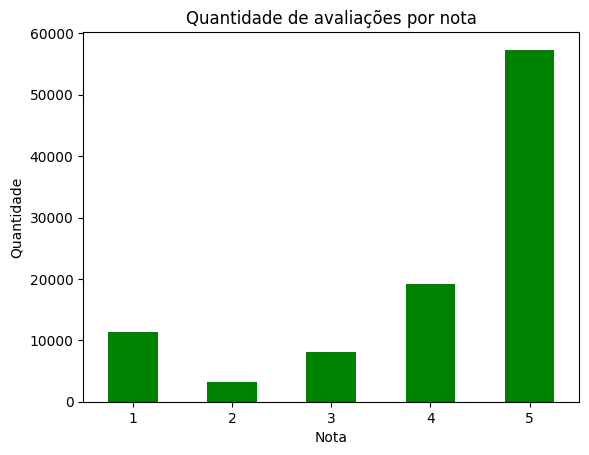

In [89]:
score_count = order_review['review_score'].value_counts().sort_index()

score_count.plot(kind='bar', xlabel='Nota', ylabel='Quantidade', title='Quantidade de avaliações por nota', color='green', rot=0)

plt.show()

Vamos analisar o dataser referente ao pagamento dos pedidos.

In [90]:
order_payments = pd.read_csv(path_order_payments)

In [91]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [92]:
print('Informações básicas', order_payments.info(), '\n')
print('-*-'*20, '\n')
print('Formato do dataset: ', order_payments.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Informações básicas None 

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Formato do dataset:  (103886, 5)


In [93]:
order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

A base de dados é constituída por 5 características e 103.886 registros e não há dados faltantes em qualquer característica.

In [94]:
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


A quantidade total de compras com identificadores únicos (99.440) é menor que a quantidade de registros na base de cálculo (103.886), o que demonstra que uma compra pode ter vários pagamentos.

In [95]:
order_payments['order_id'].value_counts().head(15)

order_id
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
ee9ca989fc93ba09a6eddc250ce01742    19
4bfcba9e084f46c8e3cb49b0fa6e6159    15
21577126c19bf11a0b91592e5844ba78    15
3c58bffb70dcf45f12bdf66a3c215905    14
4689b1816de42507a7d63a4617383c59    14
4fb76fa13b108a0d0478483421b0992c    13
cf101c3abd3c061ca9f78c1bbb1125af    13
73df5d6adbeea12c8ae03df93f346e86    13
c6492b842ac190db807c15aff21a7dd6    12
67d83bd36ec2c7fb557742fb58837659    12
Name: count, dtype: int64

Cada pagamento de uma compra é identificado por um número sequencial (payment_sequantial) iniciado em 1.

Por exemplo, a compra identificada pelo id ccf804e764ed5650cd8759557269dc13 teve com 26 pagamentos, sendo 1 pagamento com cartão de crédito e os demais com voucher.

In [96]:
order_payments[order_payments['order_id'] == 'ccf804e764ed5650cd8759557269dc13']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4346,ccf804e764ed5650cd8759557269dc13,19,voucher,1,1.68
14362,ccf804e764ed5650cd8759557269dc13,1,credit_card,1,2.20
16279,ccf804e764ed5650cd8759557269dc13,14,voucher,1,0.97
18876,ccf804e764ed5650cd8759557269dc13,15,voucher,1,1.11
21447,ccf804e764ed5650cd8759557269dc13,6,voucher,1,2.26
32393,ccf804e764ed5650cd8759557269dc13,26,voucher,1,23.10
38001,ccf804e764ed5650cd8759557269dc13,2,voucher,1,1.45
39132,ccf804e764ed5650cd8759557269dc13,25,voucher,1,1.53
40369,ccf804e764ed5650cd8759557269dc13,5,voucher,1,2.69
40387,ccf804e764ed5650cd8759557269dc13,3,voucher,1,1.15


Uma compra também pode ser parcelada, a coluna "payment_installments" indica a quantidade de parcelas.

Quanto aos valores dos pagamentos, consolidamos o total por compra (order_id) e verificamos as principais medidas estatísticas.

In [97]:
order_total_value = order_payments.groupby('order_id').sum(numeric_only=True)
order_total_value['payment_value'].sort_values(ascending=False)

order_id
03caa2c082116e1d31e67e9ae3700499    13664.08
736e1922ae60d0d6a89247b851902527     7274.88
0812eb902a67711a1cb742b3cdaa65ae     6929.31
fefacc66af859508bf1a7934eab1e97f     6922.21
f5136e38d1a14a4dbd87dff67da82701     6726.66
                                      ...   
e8bbc1d69fee39eee4c72cb5c969e39d       10.07
f1d5c2e6867fa93ceee9ef9b34a53cbf        9.59
c8c528189310eaa44a745b8d9d26908b        0.00
00b1cb0320190ca0daa2c88b35206009        0.00
4637ca194b6387e2d538dc89b124b0ee        0.00
Name: payment_value, Length: 99440, dtype: float64

In [103]:
order_total_value['payment_value'].describe()


count    99440.000000
mean       160.990267
std        221.951257
min          0.000000
25%         62.010000
50%        105.290000
75%        176.970000
max      13664.080000
Name: payment_value, dtype: float64

O valor médio de pagamento é $160.99, com desvio padrão de $221.95, o que permite concluir que há valores esparços. De fato, o maior pagamento é de $13664.08, embora 75\% deles não superem $176.97.

A ánalise do dataset dos produtos será apresentada a seguir.